**<h2>Question 1:</h2>**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
##Importing dataset
df = pd.read_csv("/content/data.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/data.csv'

In [69]:
#Converting Enter Time and Leave Time into Fraction Time columns to encode it to help it to use in the model

arr1 = pd.to_datetime(df["Enter Time"])
arr1 = arr1.dt.strftime('%Y-%m-%d %H:%M:%S')

arr2 = pd.to_datetime(df["Leave Time"])
arr2 = arr2.dt.strftime('%Y-%m-%d %H:%M:%S')


df["Fractional Enter Time"] = np.zeros((len(df),1))
df["Fractional Leave Time"] = np.zeros((len(df),1))

for i in range(len(arr1)):
  date,time = arr1[i].split(" ")
  hours,min,sec = time.split(":")
  val = int(hours)*60 + int(min)
  df.loc[i,"Fractional Enter Time"] = val/(24*60)

for i in range(len(arr2)):
  date,time = arr2[i].split(" ")
  hours,min,sec = time.split(":")
  val = int(hours)*60 + int(min)
  df.loc[i,"Fractional Leave Time"] = val/(24*60)

df



,Day,Enter Time,Leave Time,Holiday,Work after,Meal type,Waiting Time(min),Time spent(min),Fractional Enter Time,Fractional Leave Time
0,Thursday,9:40,10:05,Yes,No,Breakfast,2,25,0.402778,0.420139
1,Wednesday,20:30,21:20,No,No,Dinner,14,50,0.854167,0.888889
2,Wednesday,13:00,13:25,No,No,Lunch,2,25,0.541667,0.559028
3,Wednesday,9:30,10:00,No,No,Breakfast,3,30,0.395833,0.416667
4,Thursday,13:45,14:30,Yes,No,Lunch,3,45,0.572917,0.604167
5,Thursday,20:30,21:05,Yes,No,Dinner,2,35,0.854167,0.878472
6,Friday,8:35,8:55,No,Yes,Breakfast,1,20,0.357639,0.371528
7,Friday,13:35,14:05,No,No,Lunch,5,30,0.565972,0.586806
8,Friday,20:30,21:00,No,No,Dinner,2,30,0.854167,0.875000
9,Saturday,9:35,10:10,Yes,No,Breakfast,5,35,0.399306,0.423611


**<h4> (a) Exploratory Data Analysis: </h4>**

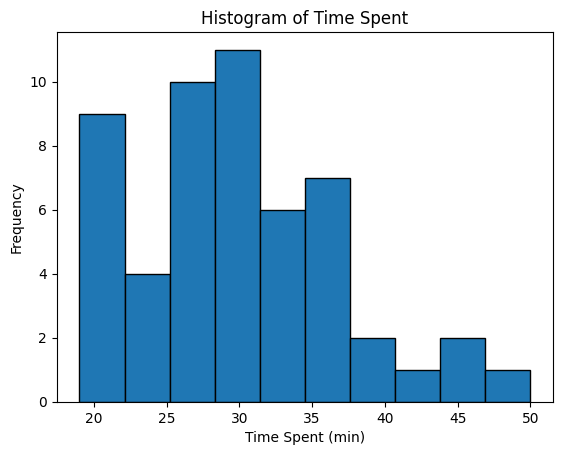

In [70]:
#Plotting distribution of Time spent in order to study ots distribution
plt.hist(df['Time spent(min)'], bins=10, edgecolor='black')
plt.title('Histogram of Time Spent')
plt.xlabel('Time Spent (min)')
plt.ylabel('Frequency')
plt.show()

**<h5> Scatter Plot for Each Meal Type for all days </h5>**

Breakfast

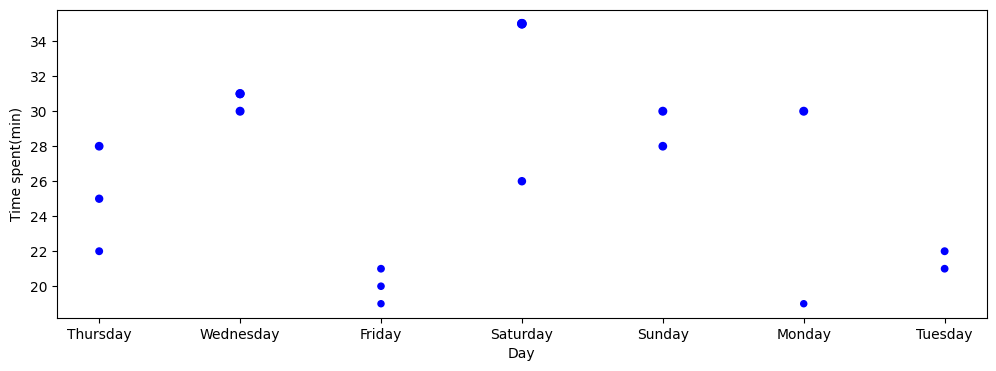

In [71]:
df_breakfast = df[df['Meal type']=='Breakfast']
df_breakfast.plot.scatter(x = 'Day', y = 'Time spent(min)', s = 'Time spent(min)', c = 'blue',figsize=(12, 4));

Lunch

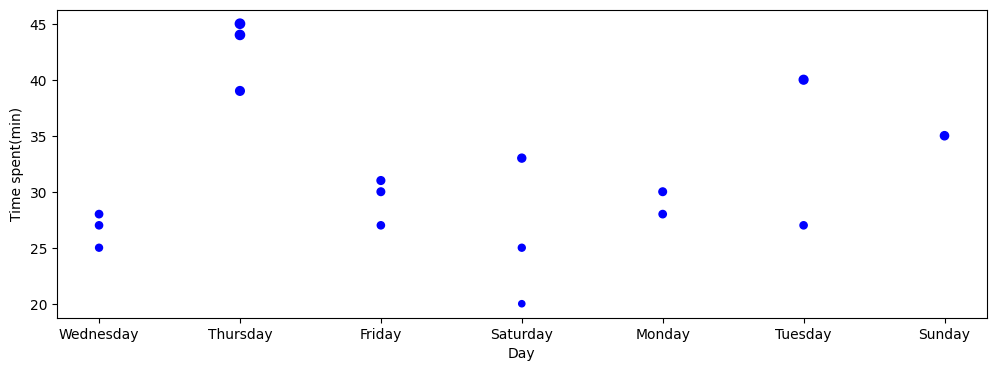

In [72]:
df_lunch = df[df['Meal type']=='Lunch']
df_lunch.plot.scatter(x = 'Day', y = 'Time spent(min)', s = 'Time spent(min)', c = 'blue',figsize=(12, 4));

Dinner

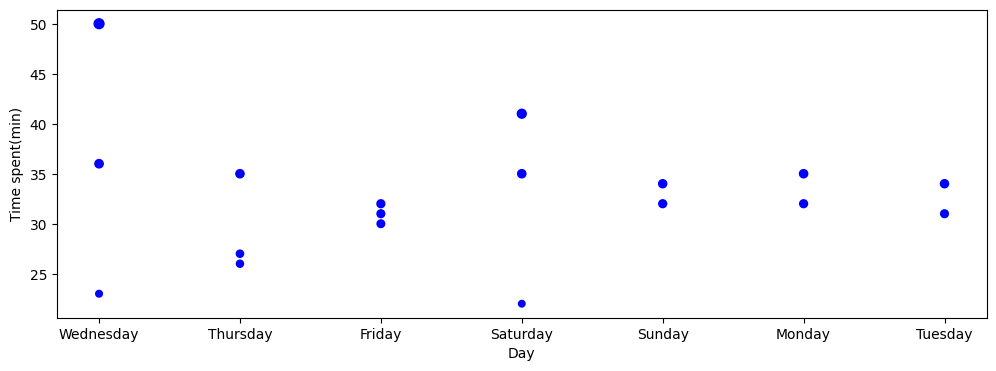

In [73]:
df_dinner = df[df['Meal type']=='Dinner']
df_dinner.plot.scatter(x = 'Day', y = 'Time spent(min)', s = 'Time spent(min)', c = 'blue',figsize=(12, 4));

**<h5> Drawn Scatter Plot for other features also: <h5>**
Meal type

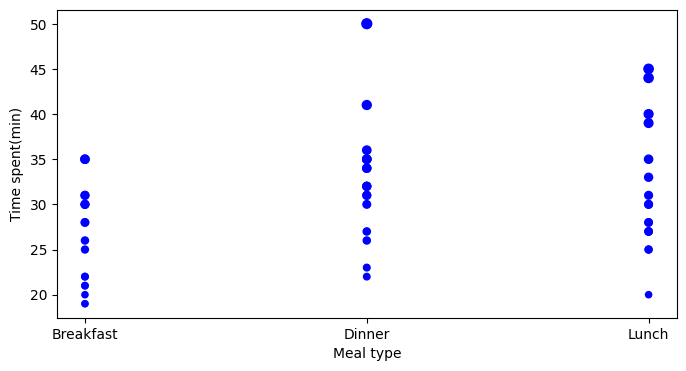

In [74]:
df.plot.scatter(x = 'Meal type', y = 'Time spent(min)', s = 'Time spent(min)', c = 'blue',figsize=(8, 4));

Holiday(Yes/No)

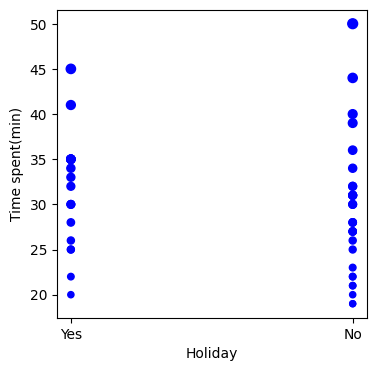

In [75]:
df.plot.scatter(x = 'Holiday', y = 'Time spent(min)', s = 'Time spent(min)', c = 'blue',figsize=(4, 4));

Checking if there is work/class after

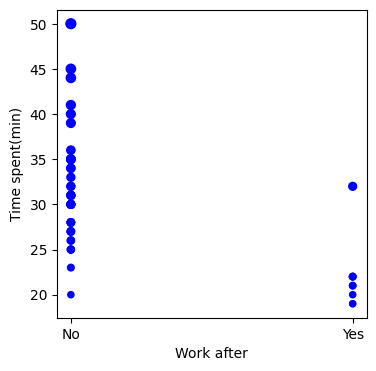

In [76]:
df.plot.scatter(x = 'Work after', y = 'Time spent(min)', s = 'Time spent(min)', c = 'blue',figsize=(4, 4));

Waiting time in the mess(to get food)

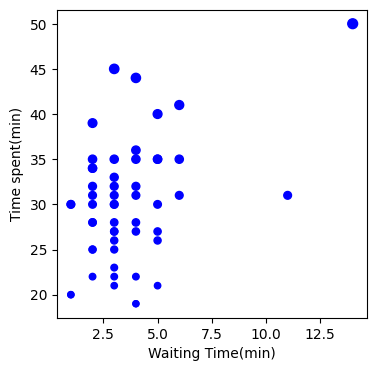

In [77]:
df.plot.scatter(x = 'Waiting Time(min)', y = 'Time spent(min)', s = 'Time spent(min)', c = 'blue',figsize=(4, 4));

Fractional Enter Time(calculated above)

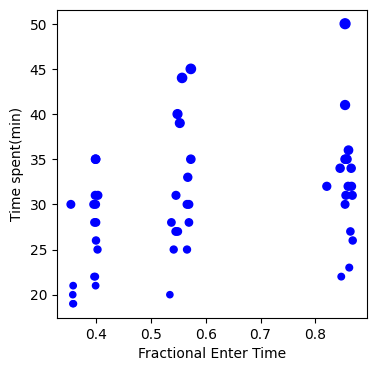

In [78]:
df.plot.scatter(x = 'Fractional Enter Time', y = 'Time spent(min)', s = 'Time spent(min)', c = 'blue',figsize=(4, 4));

Fractional Leave Time(calculated above)

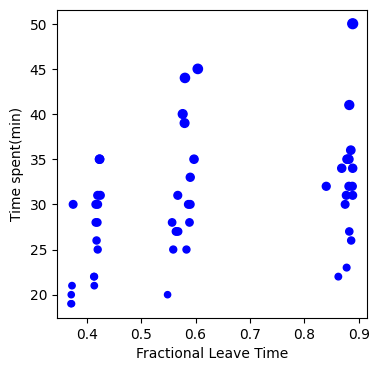

In [79]:
df.plot.scatter(x = 'Fractional Leave Time', y = 'Time spent(min)', s = 'Time spent(min)', c = 'blue',figsize=(4, 4));

**<h4>Model Development and Testing </h4>**

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,PoissonRegressor,TweedieRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder


In [81]:
# Convert categorical columns to one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Day', 'Work after','Meal type','Holiday'])

# Splitting data
X = df_encoded.drop(['Time spent(min)','Waiting Time(min)','Leave Time','Enter Time','Fractional Leave Time'], axis=1)
y = df_encoded['Time spent(min)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Looking at the scatter plots and trying different combinations of features, we found that waiting time was mostly constant in the range of 3-4 min and doesn't affect the time spent by much. Hence we decided to drop the feature. The fractional leave time and fractional enter time together works reall well on the data but it is in a way giving the model the answer since we are giving the enter time and leave time in encoded form. So we decide to keep only fractional enter time as a feature.

**<h4> Linear Regression </h4>**

In [82]:
##Converting to polynomial features
poly_features = PolynomialFeatures(degree=1, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

In [83]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y_train)

LinearRegression()

In [84]:
y_pred = lin_reg.predict(X_poly_train)

# Evaluation
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error: {mse}")

r2_score = lin_reg.score(X_poly_train,y_train)
print(f"R2 score: {r2_score}")

Mean Squared Error: 31.279385909749333
R2 score: 0.3738159160107378


In [85]:
X_poly_test = poly_features.transform(X_test)
y_pred = lin_reg.predict(X_poly_test)
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2_score = lin_reg.score(X_poly_test,y_test)
print(f"R2 score: {r2_score}")

Mean Squared Error: 11.326676088971574
R2 score: 0.5422418815078289


In [86]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds

,Actual,Predicted
19,34,34.086382
41,31,28.252947
47,21,18.332107
12,30,29.328440
43,36,32.406402
5,35,36.815454
17,21,22.493331
50,35,28.145943
3,30,28.142290
32,28,31.043624


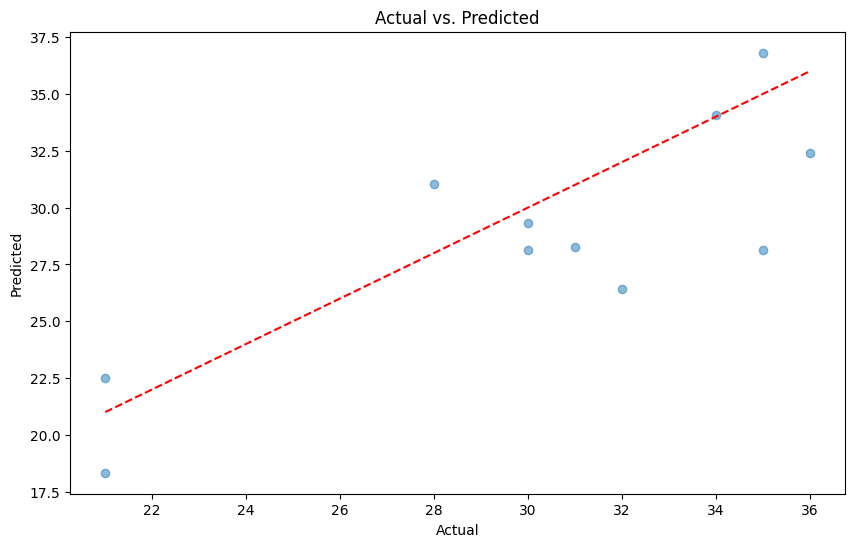

In [87]:
#Checks how close the predicted values are to the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], '--', color='red')  # 45-degree line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

After trying Linear(Polynomial) regression, degree 1 polynomial works the best giving 11.32 Mean Squared Error and R2 score of 0.54.

**<h4>Poisson Regression: </h4>**

We are using the same features that we used in linear regression.

In [88]:
# Convert categorical columns to one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Day', 'Work after','Meal type','Holiday'])
X = df_encoded.drop(['Leave Time','Enter Time','Time spent(min)','Waiting Time(min)','Fractional Leave Time'],axis=1)
y = df_encoded['Time spent(min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(42, 15)
(11, 15)


**<h4>Poisson Regression Implementation:</h4>**

We have used batch gradient descent and the update equation is derived using maximum log likelihood. We are minimizing the negative of the log likelihood in order to get the optimal value of theta.

The predict function is made to predict on the test data.

In [89]:
def Weights(m):
    weights = np.zeros(m)   #initialized to zero
    return weights

def BatchGradientDescent(X,y,iter,lr=0.01):  #gradient descent
    X = X.to_numpy()
    y = y.to_numpy()
    m,n = X.shape
    theta = Weights(n+1)
    X_0 = np.array([np.ones(m)])   #adding bias
    X = np.concatenate((X.T,X_0),axis=0)
    theta = theta.reshape(n+1,1)
    for j in range(iter):
        z = np.matmul(X.T,theta)
        h = np.exp(z)
        theta = theta - lr*(np.matmul(X,h-y.reshape(m,1)))     #update equation
    return theta

def predict(X,theta):
  X = X.to_numpy()
  m,n = X.shape
  X_0 = np.array([np.ones(m)])      #adding bias
  X = np.concatenate((X.T,X_0),axis=0)
  z = np.matmul(X.T,theta)
  h = np.exp(z)
  return h


In [90]:
#Fitting the training data on the Poisson Regression model
theta = BatchGradientDescent(X_train,y_train,300,lr=0.0001)
test_predicted = predict(X_test,theta)
train_predicted = predict(X_train,theta)

print("Theta(Coefficients):")
for i in range(len(theta)-1):
  print(f"{X_test.columns[i]} {theta[i]}")

Theta(Coefficients):
Fractional Enter Time [0.65843625]
Day_Friday [0.12661938]
Day_Monday [0.13044392]
Day_Saturday [0.10878879]
Day_Sunday [0.18662746]
Day_Thursday [0.23660813]
Day_Tuesday [0.21542403]
Day_Wednesday [0.15960489]
Work after_No [0.74929743]
Work after_Yes [0.41481917]
Meal type_Breakfast [0.45164506]
Meal type_Dinner [0.28176004]
Meal type_Lunch [0.4307115]
Holiday_No [0.54834956]
Holiday_Yes [0.61576704]


**<h5> Observations: </h4>**
1.   From the values of theta we can observe that the feature "Work after_No" is the most important since it has the maximum value followed by the feature "Holiday" and "Enter Time".
2.   This indicates that the time spent in the mess highly depends on whether there is work afterwards(naturally since in that case we would spend less time).
3.  Also it depends whether there is a holiday or not.
4.   Enter time matters because if we come early we may spend less time(waiting time is less as well as less people).
5. We see that there is not much correlation of days with time spent since on average we spend same time in the mess.
6. Meal types Breakfast and Lunch affect time spent more than Dinner.



In [91]:
##Evaluation
test_mse = mean_squared_error(y_test,test_predicted)
train_mse = mean_squared_error(y_train,train_predicted)

print("Test: ",test_mse)
print("Train: ",train_mse)

Test:  12.665332355933835
Train:  31.187154560703362


In [92]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': test_predicted.squeeze()})
df_preds

,Actual,Predicted
19,34,34.078883
41,31,28.091683
47,21,18.944041
12,30,29.983576
43,36,32.125755
5,35,36.964705
17,21,21.269448
50,35,28.574999
3,30,28.040351
32,28,30.845754


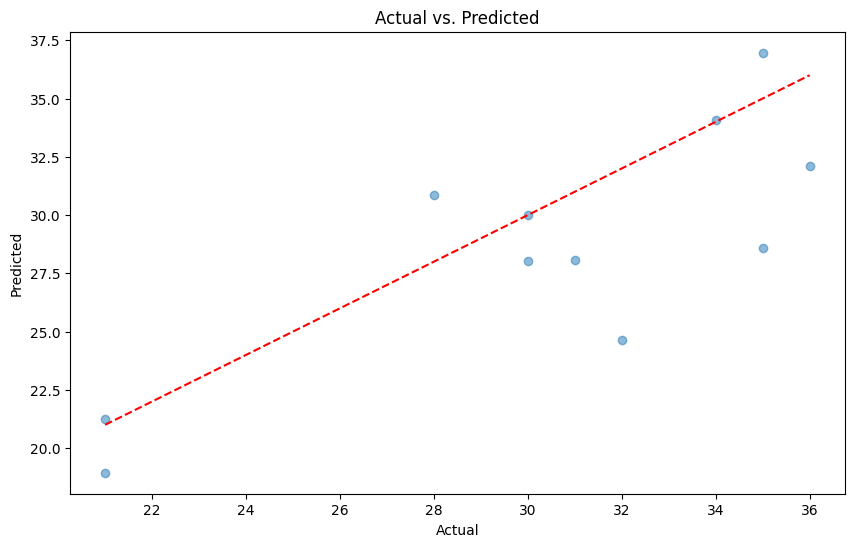

In [93]:
#Checking how close the predicated value is to the actual value
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predicted, alpha=0.5)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], '--', color='red')  # 45-degree line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

**<h4> Conclusion: <h4>**


1.   We tried both linear regression model and poisson regression models. Both perform almost the same using the Mean Squared Error metrics since it gives a good measure of the closeness of the actual values and predicted values.
2.   Linear Regression performed slightly better with MSE 11.32 while poisson gave MSE as 12.66 after 300 iterations and a learning rate of 0.0001.
3.   We could use Poisson Regression since the values are positive and real valued though it is not the best choice it works fine because the time spent in the mess is mostly in the range 25-35 minutes.
4    The train MSE is more than the test MSE beacuse training set has more datapoints.
5.   Since the dataset is very small(53 data points) it is difficult to get a good fit but linear regression is the most well performing model among the other model we tried on.
6.   Collecting more data could help in developing a more robust model.

